#Data Preparation
---



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras import layers, models

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
print(f'There are {np.isnan(train_images).sum()} null values present in train_images')
print(f'There are {np.isnan(test_images).sum()} null values present in test_images')
print(f'There are {np.isnan(train_labels).sum()} null values present in train_labels')
print(f'There are {np.isnan(test_labels).sum()}  null values present in test_labels')

There are 0 null values present in train_images
There are 0 null values present in test_images
There are 0 null values present in train_labels
There are 0  null values present in test_labels


In [ ]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
x_train,val_X,y_train,val_y = train_test_split(train_images,train_labels,test_size = 0.2) #Data Splitting



# Exploratory Data Analysis (EDA)

In [ ]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
print("X Train data shape:", x_train.shape) #Printing the training and validation data shapes
print("Y Train labels shape:", val_X.shape)

X Train data shape: (48000, 28, 28)
Y Train labels shape: (12000, 28, 28)


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


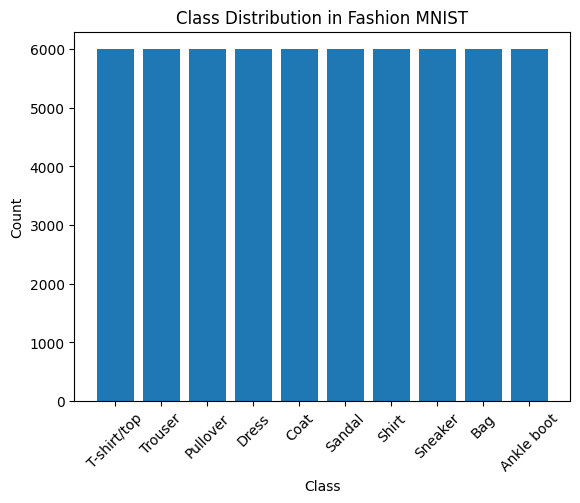

Class-wise Distribution:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


In [ ]:
#Printing the plots of classwise distribuition
class_distribution = np.bincount(train_labels)
classes = [class_names[i] for i in range(10)]
plt.bar(classes, class_distribution)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Class Distribution in Fashion MNIST')
plt.show()
classes = [class_names[i] for i in range(10)]
print("Class-wise Distribution:")
for class_name, count in zip(classes, class_distribution):
    print(f"{class_name}: {count}")

In [ ]:
classes = [class_names[i] for i in range(10)]
print("Class-wise Distribution:")
for class_name, count in zip(classes, class_distribution):
    print(f"{class_name}: {count}")



Class-wise Distribution:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


In [ ]:
# Descriptive Statistics

x_train_reshaped = x_train.reshape(-1)
val_X_reshaped = val_X.reshape(-1)
mean_x_train = np.mean(x_train_reshaped)
mean_val_X = np.mean(val_X_reshaped)
std_dev_x_train = np.std(x_train_reshaped)
std_dev_val_X = np.std(val_X_reshaped)
min_x_train = np.min(x_train_reshaped)
max_x_train = np.max(x_train_reshaped)
min_val_X = np.min(val_X_reshaped)
max_val_X = np.max(val_X_reshaped)
print(f"x_train Mean: {mean_x_train}, Standard Deviation: {std_dev_x_train}, Min: {min_x_train}, Max: {max_x_train}")
print(f"val_X Mean: {mean_val_X}, Standard Deviation: {std_dev_val_X}, Min: {min_val_X}, Max: {max_val_X}")


x_train Mean: 72.98420835990646, Standard Deviation: 90.03656600171456, Min: 0, Max: 255
val_X Mean: 72.76492772108844, Standard Deviation: 89.95940763984308, Min: 0, Max: 255


## PIXEL VALUES DISTRIBUITON
---



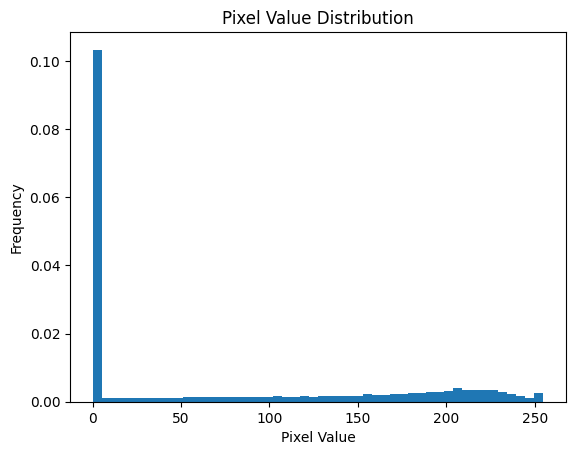

In [ ]:
plt.hist(x_train.flatten(), bins=50, range=(0, 255), density=True)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
image_sizes = np.array([img.shape for img in x_train])
image_sizes


array([[28, 28],
       [28, 28],
       [28, 28],
       ...,
       [28, 28],
       [28, 28],
       [28, 28]])

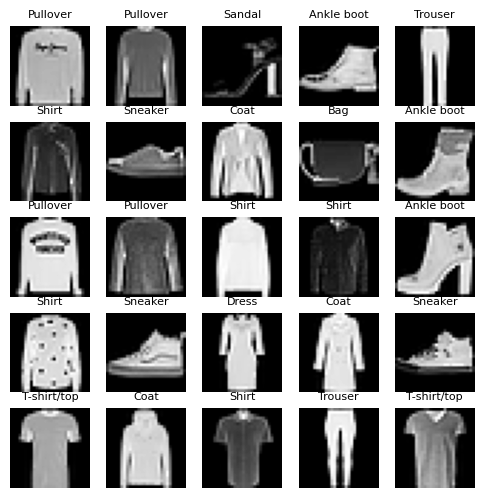

In [ ]:
#Plloting few images from the dataset
plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]],fontsize=8)
    plt.axis('off')
plt.show()

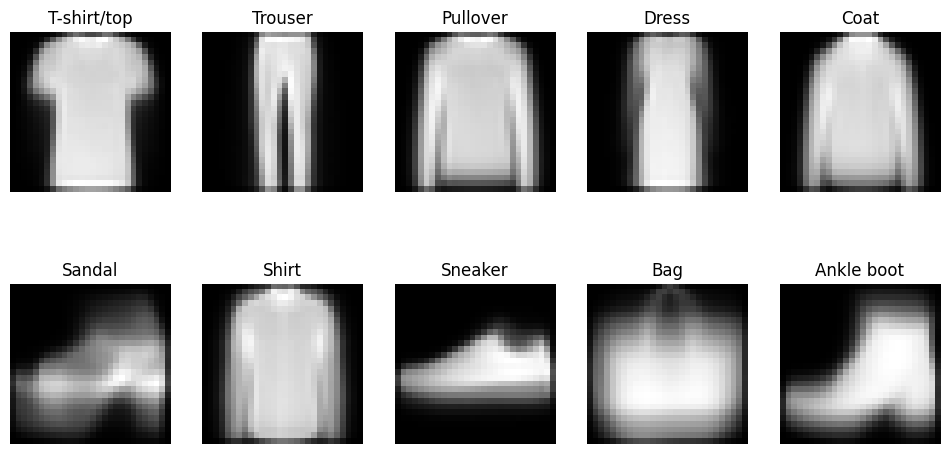

In [ ]:
#plotting the mean of each class
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    class_images = x_train[y_train == i]
    mean_image = np.mean(class_images, axis=0)
    plt.imshow(mean_image, cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

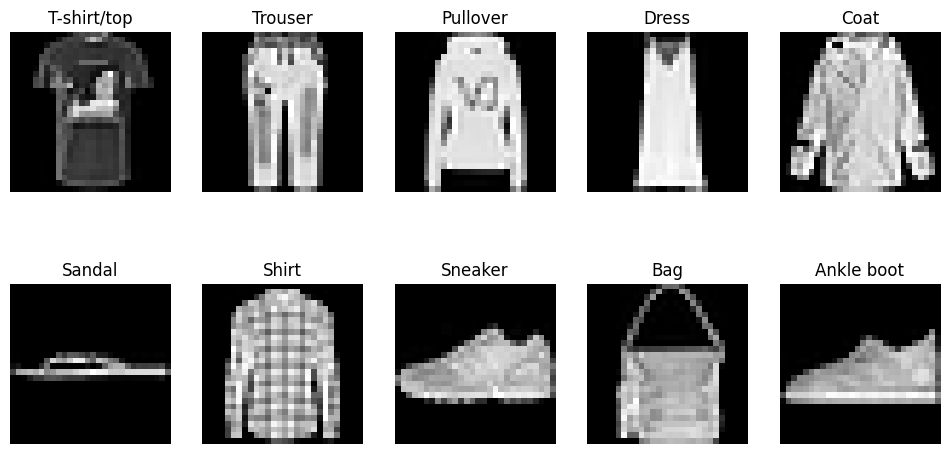

In [ ]:
#plotting one one image from each class
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    class_images = x_train[y_train == i]
    random_index = np.random.randint(0, len(class_images))
    plt.imshow(class_images[random_index], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

In [ ]:
train_images = train_images/255.0 #Data Normalisation

In [ ]:
# Checking the training and validation data samples

y_train_flat = y_train.flatten()
val_y_flat = val_y.flatten()

# Count the occurrences of each class in the training set
train_counts = np.bincount(y_train_flat)

# Count the occurrences of each class in the validation set
val_counts = np.bincount(val_y_flat)

# Print the counts for each class
for class_label, count in enumerate(train_counts):
    print(f'Training Set - Class {class_label}: {count} samples')

for class_label, count in enumerate(val_counts):
    print(f'Validation Set - Class {class_label}: {count} samples')

Training Set - Class 0: 4769 samples
Training Set - Class 1: 4768 samples
Training Set - Class 2: 4839 samples
Training Set - Class 3: 4852 samples
Training Set - Class 4: 4770 samples
Training Set - Class 5: 4765 samples
Training Set - Class 6: 4802 samples
Training Set - Class 7: 4798 samples
Training Set - Class 8: 4816 samples
Training Set - Class 9: 4821 samples
Validation Set - Class 0: 1231 samples
Validation Set - Class 1: 1232 samples
Validation Set - Class 2: 1161 samples
Validation Set - Class 3: 1148 samples
Validation Set - Class 4: 1230 samples
Validation Set - Class 5: 1235 samples
Validation Set - Class 6: 1198 samples
Validation Set - Class 7: 1202 samples
Validation Set - Class 8: 1184 samples
Validation Set - Class 9: 1179 samples


#MODEL SELECTION AND EXPERIMENTS

##  ARTIFICIAL NUERAL NETWORK MODEL

BASE ANN MODEL

In [ ]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
x_train,val_X,y_train,val_y = train_test_split(train_images,train_labels,test_size = 0.2)


In [ ]:
def base_model():
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  print(model.summary())
  return model


In [ ]:
model = base_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, verbose=2,validation_data=(val_X,val_y))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
1500/1500 - 9s - loss: 0.5216 - accuracy: 0.8171 - val_loss: 0.3934 - val_accuracy: 0.8594 - 9s/epoch - 6ms/step
Epoch 2/20
1500/1500 - 4s - loss: 0.3883 - accuracy: 0.8602 - val_loss: 0.3903 - val_accuracy: 0.8592 - 4s/epoch - 3ms/step
Epoch 3/20
1500/1500 - 6s

### EXPERIMENTING WITH DIFFERENT NUMBER OF LAYERS KEEPING OTHER PARAMETERS CONSTANT

In [ ]:
def model_experiment_number_of_layers(number_of_layers):
  plt.figure(figsize=(8, 8))
  print(f'------ Model details with number of layers : {number_of_layers}------')
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  for i in range(number_of_layers):
    model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  print(model.summary())
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train, epochs=20, verbose=2,validation_data=(val_X,val_y))
  plt.plot(history.history['accuracy'], 'green')
  plt.plot(history.history['val_accuracy'],'red')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.xticks(range(1, 21))
  plt.title(f' Plot for layers : {number_of_layers}')
  plt.legend(['train', 'validate'], loc='upper left')
  plt.show()
  print('\n')
  history_df = pd.DataFrame(history.history)
  history_df['Layers'] = number_of_layers
  history_df['Epoch'] = history_df.index + 1

  return history,history_df
  # return history.history['accuracy'] , history.history['val_accuracy']



------ Model details with number of layers : 1------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
1500/1500 - 5s - loss: 0.5210 - accuracy: 0.8166 - val_loss: 0.4196 - val_accuracy: 0.8513 - 5s/epoch - 4ms/step
Epoch 2/20
1500/1500 - 4s - loss: 0.3953 - accuracy: 0.8574 - val_loss: 0.3755 - val_accuracy: 0

<Figure size 800x800 with 0 Axes>

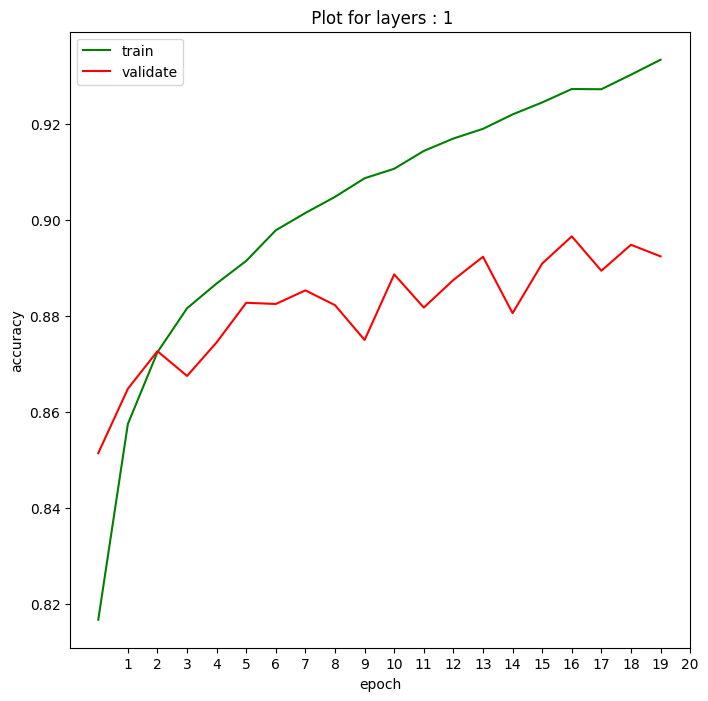



------ Model details with number of layers : 3------
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________

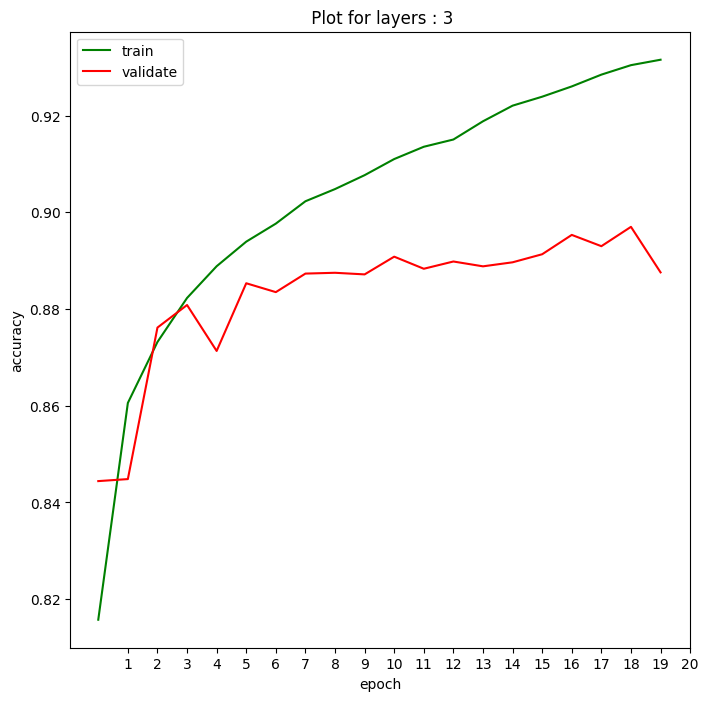



------ Model details with number of layers : 5------
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 

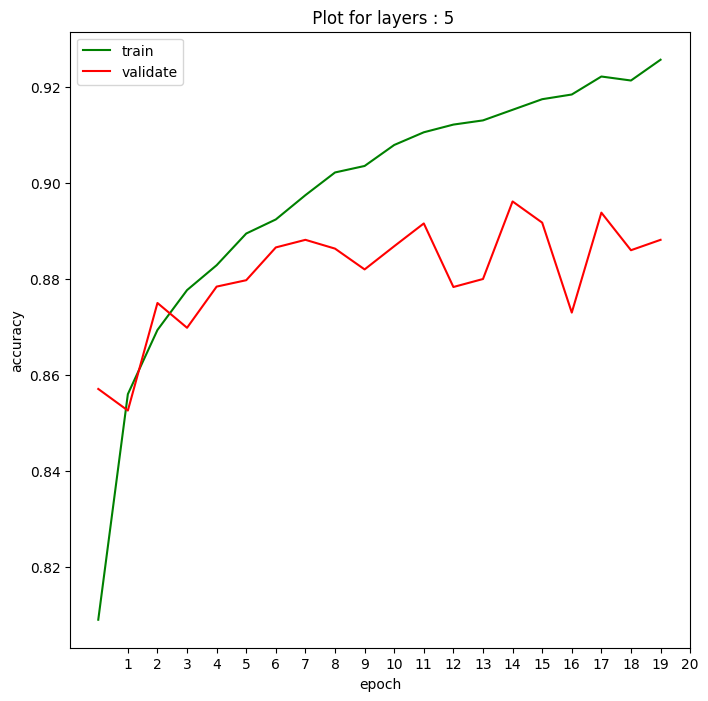



------ Model details with number of layers : 7------
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 

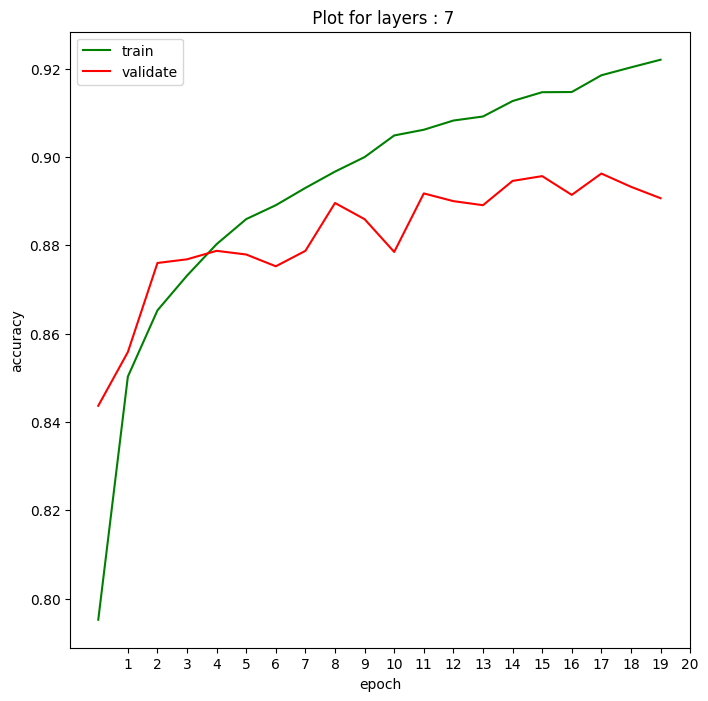



------ Model details with number of layers : 9------
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 

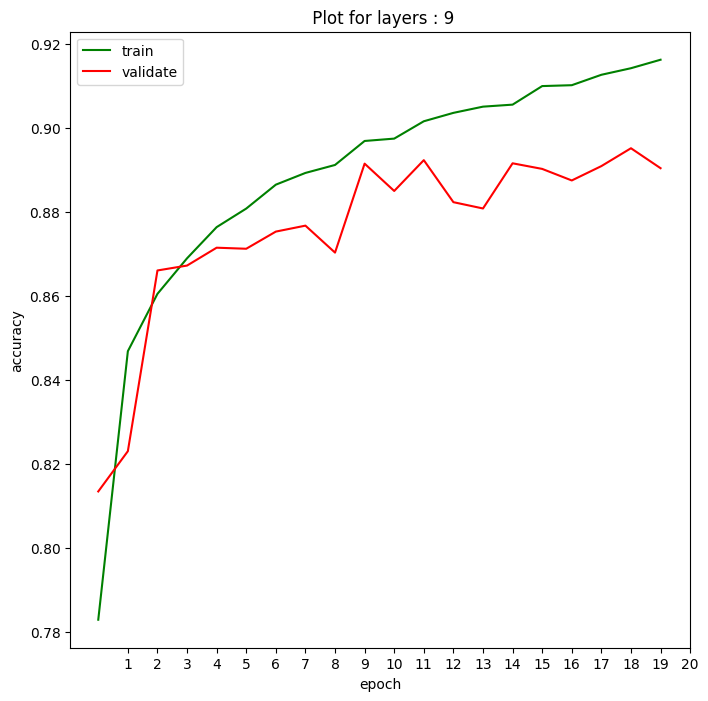

In [ ]:
layers_list = [1,3,5,7,9]
plt.figure(figsize=(8, 8))
accuracies_list = []
val_accuracies = []
all_histories = []
best_model = None
best_accuracy = 0
best_loss = float('inf')
optimal_layers = 1
for layers_number in layers_list:

  history,history_df = model_experiment_number_of_layers(layers_number)
  val_accuracy = history.history['val_accuracy'][-1]
  val_loss = history.history['val_loss'][-1]
  all_histories.append(history_df)
  if val_accuracy > best_accuracy or (val_accuracy == best_accuracy and val_loss < best_loss):
      best_accuracy = val_accuracy
      best_loss = val_loss
      optimal_layers = layers_number



all_histories_df = pd.concat(all_histories, ignore_index=True)



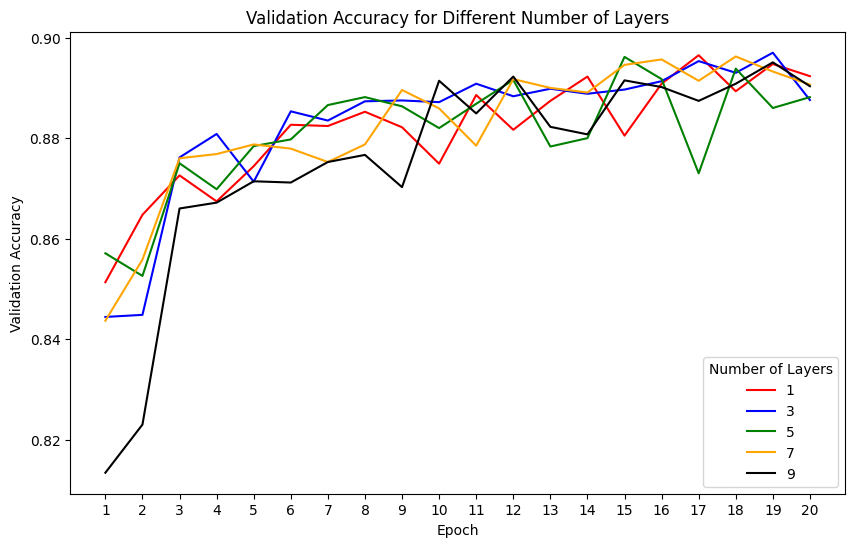

In [ ]:
all_histories_df = pd.concat(all_histories, ignore_index=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='val_accuracy', hue='Layers', data=all_histories_df,palette=['red', 'blue', 'green', 'orange','black'])

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 21))
plt.title('Validation Accuracy for Different Number of Layers')
plt.legend(title='Number of Layers')
plt.show()

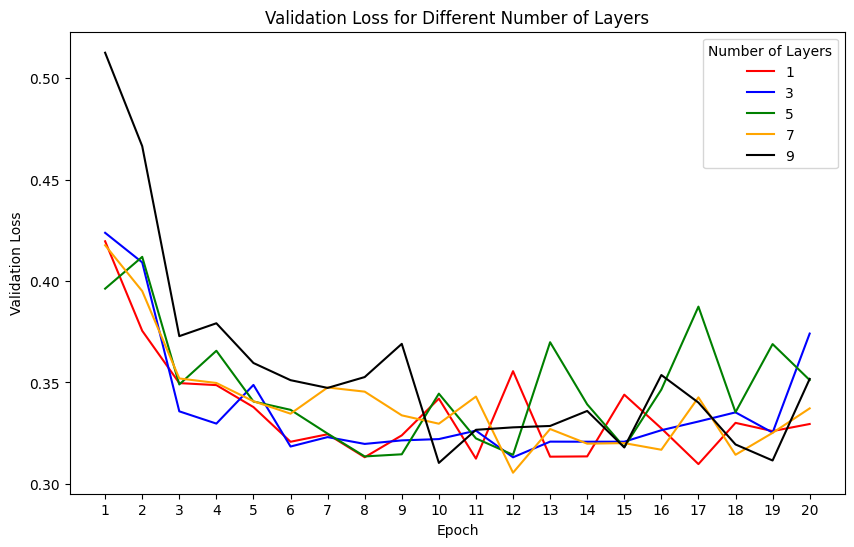

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='val_loss', hue='Layers', data=all_histories_df,palette=['red', 'blue', 'green', 'orange','black'])

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Different Number of Layers')
plt.xticks(range(1, 21))
plt.legend(title='Number of Layers')
plt.show()

### EXPERIMENTING WITH LEARNING RATES


In [ ]:
def build_model(num_layers):
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  for i in range(num_layers):
    model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model


In [ ]:
def find_optimal_learning_rate(num_layers, x_train, y_train,learning_rate):

    model = build_model(num_layers)
    print(model.summary())

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


    history = model.fit(x_train, y_train, epochs=20, validation_data=(val_X, val_y), verbose=2)


    plt.figure(figsize=(10, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Epoch-wise Curves - {num_layers} Layers, LR={learning_rate}')
    plt.legend()
    plt.xticks(range(1, 21))

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Epoch-wise Curves - {num_layers} Layers, LR={learning_rate}')
    plt.legend()
    plt.xticks(range(1, 21))

    plt.tight_layout()
    plt.show()


------Experimenting with Learning Rate -  0.01 ------
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                                 


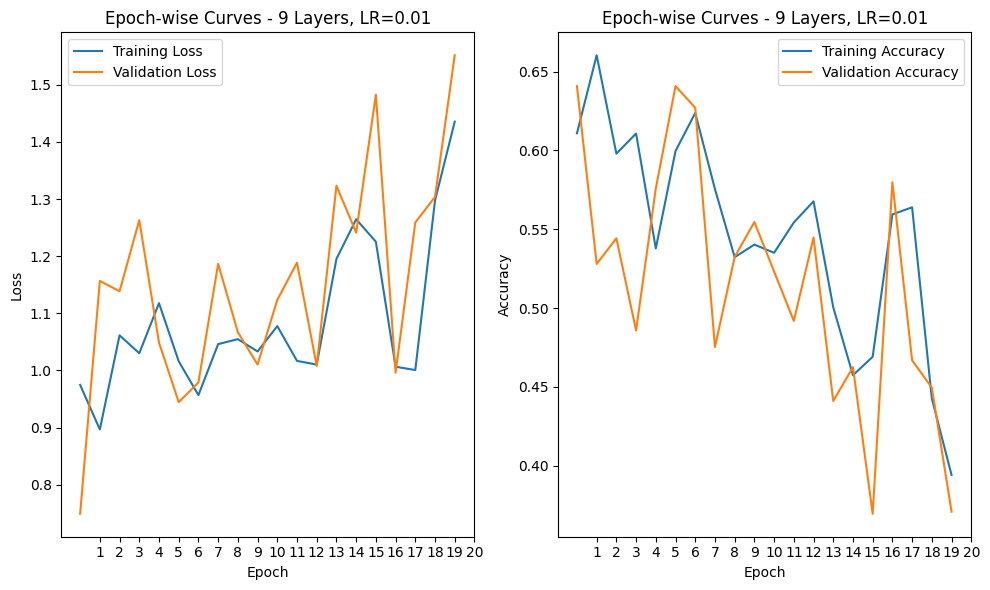

------Experimenting with Learning Rate -  0.001 ------
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 128)               100480    
                                                                 
 dense_47 (Dense)            (None, 128)               16512     
                                                                 
 dense_48 (Dense)            (None, 128)               16512     
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 

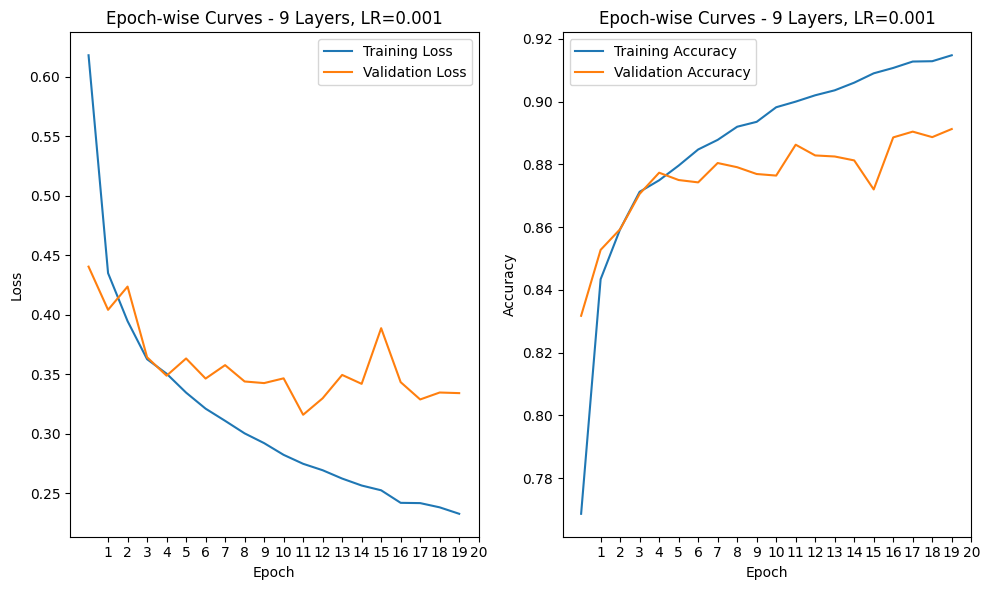

------Experimenting with Learning Rate -  0.0001 ------
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 128)               100480    
                                                                 
 dense_57 (Dense)            (None, 128)               16512     
                                                                 
 dense_58 (Dense)            (None, 128)               16512     
                                                                 
 dense_59 (Dense)            (None, 128)               16512     
                                                                 
 dense_60 (Dense)            (None, 128)               16512     
                                                               

In [ ]:
learning_rates = [0.01,1e-3, 1e-4, 1e-5]
for lr in learning_rates:
  print(f'------Experimenting with Learning Rate -  {lr} ------')
  find_optimal_learning_rate(9,x_train,y_train,lr)

It is visible that 1e-5 is the most optimal learning rate here, the most optimlal number of layers is 9 . Now lets test with different epochs

### EXPERIMENTING WITH EPOCHS

After tuning for the optimal learning rate , optimal number of hidden layers , let us tune for epochs .

In [ ]:
def build_model(num_layers):
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  for i in range(num_layers):
    model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model


In [ ]:
model = build_model(9)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, verbose=2, validation_data=(val_X, val_y))

In [ ]:
plt.figure(figsize=(5, 5))
tick_labels = [str(i) for i in range(1, len(history.history['accuracy']) + 1, 5)]

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 50 epochs ')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, len(history.history['loss']) + 1, step=5), fontsize=8)  # Adjust the fontsize as needed
tick_positions = np.arange(1, len(history.history['accuracy']) + 1, step=5)
# Manually set the tick positions and labels
plt.gca().set_xticks(tick_positions)
plt.gca().set_xticklabels(tick_labels)

plt.legend(['train', 'validation'], loc='upper left')
plt.show()


The parameters seem to stabilsie after 20 epochs. Anything after this seems to be overfiitnig. Let us now experiment our code with final model

### FINAL ANN MODEL


In [ ]:
def build_model(num_layers):
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  for i in range(num_layers):
    model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model


In [ ]:
learning_rate = 1e-5
epochs = 20
model_final = build_model(9)
model_final.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_final.fit(train_images, train_labels, epochs=20, validation_split=0.2)
test_loss, test_acc = model_final.evaluate(test_images, test_labels)



### **VALIDATION** METRICS SUCH AS ACCURACY,F1 SCORE ETC


In [ ]:
test_loss, test_acc = model_final.evaluate(test_images, test_labels)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

y_pred_prob = model_final.predict(test_images)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate additional metrics
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

# Display additional metrics
print("Final Model - Precision:", precision * 100)
print("Final Model - Recall:", recall * 100)
print("Final Model - F1 Score:", f1 * 100)
print("Final Model - F1 Score:", f1 * 100)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

conf_matrix = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display some predictions vs actual class
num_samples_to_display = 5
sample_indices = np.random.choice(len(test_labels), num_samples_to_display, replace=False)

for i in sample_indices:
    actual_class = test_labels[i]
    predicted_class = y_pred[i]

    plt.imshow(test_images[i].reshape((28, 28)), cmap='gray')
    plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}")
    plt.show()

In [ ]:
conf_matrix = confusion_matrix(test_labels, y_pred)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##CNN


In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


x_train, val_X, y_train, val_y = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

Base CNN MODEL

In [ ]:
def base_cnn_model():

  model = models.Sequential()
  model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.Dropout(0.5))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  print(model.summary())

  return model


In [ ]:
model = base_cnn_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_df, epochs=15, verbose=2, validation_data=(val_X, y_val_df))


### EXPERIMENTING WITH OPITMAL NUMBER OF LAYERS

In [ ]:

x_train, val_X, y_train, val_y = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255.0
val_X = val_X.reshape((-1,28,28,1)).astype('float32') / 255.0


y_train_df = pd.get_dummies(y_train, columns=[0], prefix='label')
y_val_df = pd.get_dummies(val_y, columns=[0], prefix='label')


test_images = test_images.reshape((-1,28,28,1)).astype('float32') / 255.0

test_labels = pd.get_dummies(test_labels, columns=[0], prefix='label')




In [ ]:


def model_experiment_layers_and_filters_varying(num_layers):
    plt.figure(figsize=(8, 8))
    print(f'------ Model details with {num_layers} layers and varying number of filters ------')

    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Dropout(0.5))


    for i in range(1, num_layers):
        model.add(layers.Conv2D(16 * i, (3, 3), activation='relu'))


    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    print(model.summary())

    return model

In [ ]:


model = model_experiment_layers_and_filters_varying(1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_df, epochs=15, verbose=2, validation_data=(val_X, y_val_df))


In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 1 Convolutional Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for 1 Convolutional Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# plt.xticks(np.arange(0, len(history.history['loss']),step=5)), fontsize=8)
plt.xticks(np.arange(0, len(history.history['loss']) + 2, step=2), fontsize=8)  #

plt.show()


In [ ]:
model = model_experiment_layers_and_filters_varying(2)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_df, epochs=15, verbose=2, validation_data=(val_X, y_val_df))



In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 2 Convolutional Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for 2 Convolutional Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# plt.xticks(np.arange(0, len(history.history['loss']),step=5)), fontsize=8)
plt.xticks(np.arange(0, len(history.history['loss']) , step=2), fontsize=8)  #

plt.show()


In [ ]:
model = model_experiment_layers_and_filters_varying(3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_df, epochs=15, verbose=2, validation_data=(val_X, y_val_df))

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 3 Convolutional Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for 3 Convolutional Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# plt.xticks(np.arange(0, len(history.history['loss']),step=5)), fontsize=8)
plt.xticks(np.arange(0, len(history.history['loss']) , step=2), fontsize=8)  #

plt.show()


In [ ]:
model = model_experiment_layers_and_filters_varying(4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_df, epochs=15, verbose=2, validation_data=(val_X, y_val_df))

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 4 Convolutional Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for 4 Convolutional Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# plt.xticks(np.arange(0, len(history.history['loss']),step=5)), fontsize=8)
plt.xticks(np.arange(0, len(history.history['loss']) , step=2), fontsize=8)  #

plt.show()


### TUNING FOR OPTIMAL LEARNING RATE

In [ ]:
def build_model_cnn(num_layers):
    plt.figure(figsize=(4, 4))

    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Dropout(0.5))


    for i in range(1, num_layers):
        model.add(layers.Conv2D(16 * i, (3, 3), activation='relu'))



    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    print(model.summary())

    return model

In [ ]:
learning_rates = [0.01,1e-3, 1e-4, 1e-5]

def experiment_learning_rate(learning_rate):
  model = build_model_cnn(3)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  history = model.fit(x_train,  y_train_df, epochs=15, validation_data=(val_X, y_val_df), verbose=2)
  plt.figure(figsize=(4, 4))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'model accuracy for {learning_rate} ')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.xticks(np.arange(0, len(history.history['loss']) , step=2), fontsize=8)
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  plt.figure(figsize=(4, 4))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'model loss for {learning_rate}')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.xticks(np.arange(0, len(history.history['loss']) , step=2), fontsize=8)

  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

learning_rates = [0.01,1e-3, 1e-4, 1e-5]
for lr in learning_rates:
  print(f'------Experimenting with Learning Rate -  {lr} ------')
  experiment_learning_rate(lr)

### TUNING FOR OPTIMAL EPOCHS

In [ ]:
def build_model_cnn(num_layers):
    plt.figure(figsize=(8, 8))


    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Dropout(0.5))


    for i in range(1, num_layers):
        model.add(layers.Conv2D(16 * i, (3, 3), activation='relu'))



    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    print(model.summary())

    return model


In [ ]:
model = build_model_cnn(3)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history = model.fit(x_train,  y_train_df, epochs=50, validation_data=(val_X, y_val_df), verbose=2)



In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training ', 'validation'], loc='upper left',fontsize='small')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### FINAL CNN MODEL

In [ ]:
def build_model_cnn(num_layers):
    plt.figure(figsize=(8, 8))


    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Dropout(0.5))


    for i in range(1, num_layers):
        model.add(layers.Conv2D(16 * i, (3, 3), activation='relu'))



    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))



    return model


In [ ]:
final_model = build_model_cnn(3)
print(final_model.summary())
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history = final_model.fit(x_train,  y_train_df, epochs=10, validation_data=(val_X, y_val_df), verbose=2)





In [ ]:
### Saving the model
final_model.save('final_model.keras')

In [ ]:

from tensorflow.keras.models import load_model
final_model = load_model('final_model.keras')

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
plt.figure(figsize=(2, 2))
plot_model(final_model, to_file='final_model_plot.png', show_shapes=True, dpi=60)

### MAKING PREDICTIONS

In [ ]:
test_loss, test_acc = final_model.evaluate(test_images, test_labels)

In [ ]:
test_labels.shape

In [ ]:
y_pred_prob = final_model.predict(test_images)
y_pred = np.argmax(y_pred_prob, axis=1)

In [ ]:
y_pred_prob.shape

In [ ]:
y_pred.shape

In [ ]:
test_labels

y_pred



In [ ]:
test_labels_ =test_labels.to_numpy()


In [ ]:
test_labels_ = np.argmax(test_labels_, axis=1)


In [ ]:
test_labels_

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

y_pred_prob = final_model.predict(test_images)
y_pred = np.argmax(y_pred_prob, axis=1)

test_labels_ =test_labels.to_numpy()
test_labels_ = np.argmax(test_labels_, axis=1)

# additional metrics
precision = precision_score(test_labels_, y_pred, average='weighted')
recall = recall_score(test_labels_, y_pred, average='weighted')
f1 = f1_score(test_labels_, y_pred, average='weighted')

#  additional metrics
print("Final Model - Precision:", precision * 100)
print("Final Model - Recall:", recall * 100)
print("Final Model - F1 Score:", f1 * 100)
print("Final Model - F1 Score:", f1 * 100)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score



# class-wise precision
precision_per_class = precision_score(test_labels_, y_pred, average=None)

#  class-wise recall
recall_per_class = recall_score(test_labels_, y_pred, average=None)

# class-wise F1 score
f1_per_class = f1_score(test_labels_, y_pred, average=None)

# class-wise metrics
for class_label, (precision_value, recall_value, f1_value) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
    print(f"Class {class_label} - Precision: {precision_value * 100:.2f}% | Recall: {recall_value * 100:.2f}% | F1 Score: {f1_value * 100:.2f}%")


In [ ]:
from sklearn.metrics import classification_report

class_report = classification_report(test_labels_, y_pred, target_names=class_names)

print(class_report)


In [ ]:

num_rows = 3
num_cols = 3
num_samples_to_display = num_rows * num_cols

sample_indices = np.random.choice(len(test_labels_), num_samples_to_display, replace=False)




fig, axes = plt.subplots(num_rows, num_cols, figsize=(3, 3))

for i, ax in enumerate(axes.flatten()):
    if i < num_samples_to_display:
         actual_class = test_labels_[i]
         predicted_class = y_pred[i]

        # Plot the test image
         ax.imshow(test_images[sample_indices[i]].reshape((28, 28)), cmap='gray')
         ax.set_title(f"Actual: {actual_class}, Predicted: {predicted_class}",fontsize=6)
         ax.axis('off')  # Turn off axis labels for cleaner display
    else:
        ax.axis('off')  # Turn off empty subplots

plt.tight_layout()
plt.show()


In [ ]:
conf_matrix = confusion_matrix(test_labels_, y_pred)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# MODEL INTERPRETABILITY




In [ ]:
train_images_expanded = np.expand_dims(train_images, axis=-1)
final_model

In [ ]:
final_model.summary()
model.save_weights('my_model_weights.h5')

In [ ]:
x_inference = x_train[:400]
x_inference.shape

In [ ]:
import matplotlib.pyplot as plt

image_num = 5
layer_num = -8


last_conv_layer = final_model.get_layer(index=layer_num)
last_conv_layer_model = tf.keras.Model(inputs=final_model.input, outputs=last_conv_layer.output)


conv_output = last_conv_layer_model.predict(x_inference)


heatmap = np.mean(conv_output, axis=-1)

heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

plt.matshow(heatmap[image_num])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_num = 5
layer_indices = [-8, -7, -6, -5, -4]

plt.figure(figsize=(15, 3))

for i, layer_num in enumerate(layer_indices, 1):
    last_conv_layer = final_model.get_layer(index=layer_num)
    last_conv_layer_model = tf.keras.Model(inputs=final_model.input, outputs=last_conv_layer.output)

    conv_output = last_conv_layer_model.predict(x_inference)

    heatmap = np.mean(conv_output, axis=-1)


    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)


    plt.subplot(2, len(layer_indices), i)
    plt.imshow(heatmap[image_num], cmap='viridis')  # Use a different colormap for better visibility


plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_num = 33
layer_indices = [-8, -7, -6, -5, -4]
plt.figure(figsize=(15, 3))

for i, layer_num in enumerate(layer_indices, 1):
    last_conv_layer = final_model.get_layer(index=layer_num)
    last_conv_layer_model = tf.keras.Model(inputs=final_model.input, outputs=last_conv_layer.output)


    conv_output = last_conv_layer_model.predict(x_inference)


    heatmap = np.mean(conv_output, axis=-1)


    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    plt.subplot(2, len(layer_indices), i)
    plt.imshow(heatmap[image_num], cmap='viridis')  # Use a different colormap for better visibility


plt.show()
